In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import stdout
from scipy.signal import savgol_filter
import scipy.stats as st

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
# Uploading the input data
filepath = ('C:/Users/USER/Desktop/coursera/python/data for dl project/bootstrapped data.csv')
data =pd.read_csv(filepath)
X = data.iloc[0:1400,:-1]
y = data.iloc[0:1400,-1]
X.shape
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(1400, 15)
(1400, 1)


In [25]:
# Normalization followed by Splitting data into train and test sets
scale = StandardScaler()
X = scale.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1120, 15) (280, 15) (1120, 1) (280, 1)


In [26]:
# Creating a pipeline
from sklearn.linear_model import Ridge
pipeline = make_pipeline(StandardScaler(), PLSRegression(max_iter=9*(10**8),scale=True))
pipeline.get_params()
hyperparameter = {'verbose': [0],
                  'plsregression__n_components':np.arange(2,41)}

In [27]:
# Creating model
rmse = sklearn.metrics.get_scorer('neg_root_mean_squared_error')
model = GridSearchCV(pipeline, hyperparameter, cv=5, n_jobs=4,pre_dispatch='2*n_jobs',return_train_score=True)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_adj_train = 1-((1-r2_train)*(y_train.shape[0]-1)/(y_train.shape[0]-(model.best_index_+2)-1))
print("R2_train_score ",r2_train)
print("R2_adj train score", r2_adj_train)
print('Mean Squared Error is:', mean_squared_error(y_train, y_train_pred),'\n')




R2_train_score  0.7655009960938266
R2_adj train score 0.7627446786880578
Mean Squared Error is: 35.6487567341621 



In [28]:
#validating model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score is:',r2)
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)
score = model.score(X_test,y_test)
MAE = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is:', MAE)
r = pd.DataFrame(np.concatenate((y_test,y_pred), axis = 1)).corr()
pear_coff = r.iloc[0,1]
print(pear_coff)
index = pear_coff/MSE
print(index)

R2 score is: 0.8114590297893159
Mean Squared Error is: 29.877392544945387
Mean Absolute Error is: 4.26865086658934
0.9160860488772838
0.030661512630300328


In [29]:
# plt.scatter(y_test,y_pred,color="black")
# plt.plot(y_test,y_pred,color="yellow",label = "PLS reg Model")
# plt.xlabel("Actual Reaction time")
# plt.ylabel("Predicted Reaction time ")
# plt.legend()

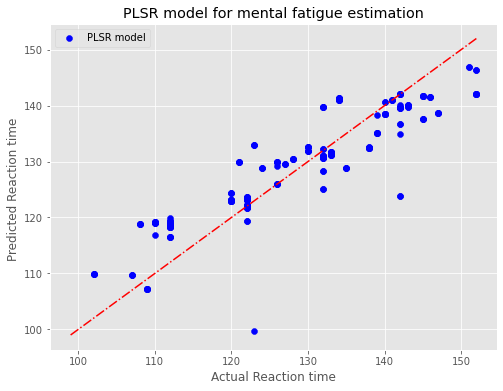

In [30]:
# Visualizing model
maxi = max(max(y_pred), max(y_test))
mini = min(min(y_pred), min(y_test))
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.scatter(y_test, y_pred, label='PLSR model', c = 'b', marker='o')
plt.plot(range(int(mini), int(maxi+1)), range(int(mini), int(maxi+1)),'-.r')
# plt.scatter(y_test,y_pred,color="black")
# plt.plot(y_test,y_pred,color="yellow",label = "ANN model")
plt.title('PLSR model for mental fatigue estimation')
plt.xlabel("Actual Reaction time")
plt.ylabel("Predicted Reaction time ")
plt.legend(loc='best')
plt.show()

In [31]:
# Calculating FastDTW
from fastdtw import fastdtw
from scipy.spatial.distance import sqeuclidean


distance, path = fastdtw(y_test,y_pred, dist=sqeuclidean)

print('FastDTW: ',distance)

FastDTW:  7443.361851932445


In [32]:
# Calculating DTW
from dtw import dtw
from scipy.spatial.distance import sqeuclidean
d, cost_matrix, acc_cost_matrix, path = dtw(y_test,y_pred, dist=sqeuclidean)
print('DTW: ',d)

DTW:  7443.361851932445


In [33]:
# Calculating cDTW
from cdtw import pydtw
d = pydtw.dtw(y_test,y_pred,pydtw.Settings(step = 'p0sym',     
                                window = 'palival', 
                                param = 2.0,        
                                norm = False,       
                                compute_path = True))
d.get_dist()

ModuleNotFoundError: No module named 'cdtw'